In [2]:
import numpy as np
import math
import h5py
import glob
import matplotlib.pyplot as plt

In [5]:
def order(vel: np.ndarray) -> float:
    """Compute order parameter from velocity matrix
    Args:
        vel: velocity matrix (N x D)
    Returns:
        order: velocity correlation
    """
    N, _ = vel.shape
    speed = np.linalg.norm(vel, axis=1, keepdims=True)  # N x 1
    speed_prod = speed.dot(speed.T)  # N x N
    mask = (speed_prod != 0)  # avoid division by zero!
    dot_prod = vel.dot(vel.T)  # N x N
    np.fill_diagonal(dot_prod, 0)  # i != j
    return (dot_prod[mask] / speed_prod[mask]).sum() / (N * (N - 1))

In [8]:
# Construct output file name
out_str = "/home/lars/vmodel_output/"
args_def = {
'nprey': 100,
'npred': 5,
'frange': 10,
'fstr': 5,
'visPred': 120,
'visPrey': 330,
'astr': 3,
'dphi': 0.2,
'repPrey': 1,
'repRadPrey': 1,
'repPred': 1,
'repRadPred': 20,
'attPrey': 2,
'attRadPrey': 3,
'repCol': 1000,
'hstr': 1,
'steps': 12000,
    }

args_def = {
'nprey': 100,
'npred': 1,
'frange': 10,
'fstr': 0.0,
'visPred': 300.0,
'visPrey': 330,
'astr': 5.0,
'dphi': 0.2,
'repPrey': 3,
'repRadPrey': 1.5,
'repPred': 1,
'repRadPred': 20,
'attPrey': 3,
'attRadPrey': 1.5,
'repCol': 10000000,
'hstr': 1,
'steps': 1500,
    }



var_par = ["npred"]
var_val = [1]

runs = len(var_par)
#runs = 1

list_args = []
for i in range(runs):
    list_args.append(args_def.copy())

if len(var_par) != len(var_val):
    sys.exit( "Lists do not match!")


for i in range(runs):
    
    args = list_args[i]
    args[var_par[i]] = var_val[i]
    
    npred = args["npred"]
    nprey = args["nprey"]
    pred_visangle = 2*math.pi*args["visPred"]/360
    prey_visangle = 2*math.pi*args["visPrey"]/360



    args_str = '_'.join(f'{k}_{v}' for k, v in args.items())
    file_h5 = f'{out_str}_{args_str}.states.nc'



    #file_h5 = "/home/lars/vmodel/output/state.nc"
    name = "/home/lars/vmodel_output/testingPoly2_change_"+str(var_par[i])+"="+str(var_val[i])+"_"+args_str
    print(name)


    with h5py.File(file_h5) as fh5:


        pos = np.moveaxis(np.array(fh5['/position']), [3,2], [1,3])[0,:,:,:]
        vel = np.moveaxis(np.array(fh5['/velocity']), [3,2], [1,3])[0,:,:,:]
        vis = np.array(fh5['/visibility'])

/home/lars/vmodel_output/testingPoly2_change_npred=1_nprey_100_npred_1_frange_10_fstr_0.0_visPred_300.0_visPrey_330_astr_5.0_dphi_0.2_repPrey_3_repRadPrey_1.5_repPred_1_repRadPred_20_attPrey_3_attRadPrey_1.5_repCol_10000000_hstr_1_steps_1500


In [10]:
np.shape(pos)

(1498, 101, 2)

In [17]:
pol = []
predTime = 2
for i in range(args["steps"]-predTime):
    pol.append(order(vel[i,:nprey,:]))

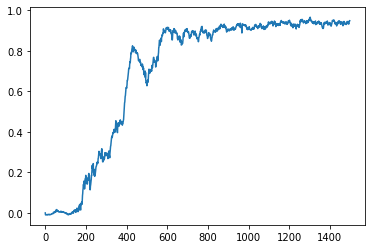

In [20]:
plt.plot(pol)

In [6]:
a = np.zeros((5,5))
a[1,3] = 2
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [10]:
from numpy import loadtxt
lines = loadtxt("noPred_pol_astr_dphi.csv", comments="#", delimiter=",", unpack=False)

In [11]:
np.shape(lines)


(20, 20)

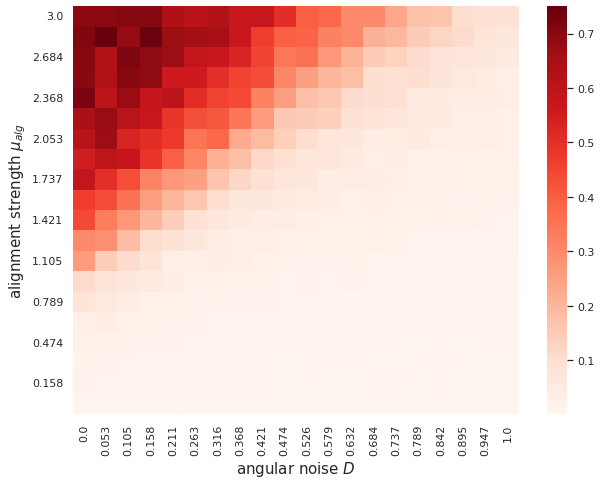

In [157]:
import pandas as pd
import seaborn as sns; sns.set_theme()
import array as arr
data = pd.read_csv("noPred_noMultColpol_astr_dphi.csv", header=None, index_col=False)
data = data[::-1]


steps = 20
reps = 30


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

data.index = np.flip(np.round(paraChange1_val,3))
data.columns = np.round(paraChange2_val,3)


sns.heatmap(data, cmap="Reds")

plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.gcf().set_size_inches(10,7.5)

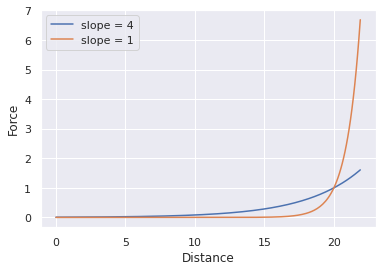

In [152]:
x = np.array(range(220))
x = x/10
#plt.plot(x, np.exp((x)))

pitch = 4
plt.plot(x, np.exp(-20/pitch+(x/pitch)), label = "slope = 4")
pitch = 1
plt.plot(x, np.exp(-20/pitch+(x/pitch)), label = "slope = 1")
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Force')
plt.savefig("func.png")

In [66]:
x+10

array([  10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   50,   51,   52,   53,
         54,   55,   56,   57,   58,   59,   60,   61,   62,   63,   64,
         65,   66,   67,   68,   69,   70,   71,   72,   73,   74,   75,
         76,   77,   78,   79,   80,   81,   82,   83,   84,   85,   86,
         87,   88,   89,   90,   91,   92,   93,   94,   95,   96,   97,
         98,   99,  100,  101,  102,  103,  104,  105,  106,  107,  108,
        109,  110,  111,  112,  113,  114,  115,  116,  117,  118,  119,
        120,  121,  122,  123,  124,  125,  126,  127,  128,  129,  130,
        131,  132,  133,  134,  135,  136,  137,  138,  139,  140,  141,
        142,  143,  144,  145,  146,  147,  148,  149,  150,  151,  152,
        153,  154,  155,  156,  157,  158,  159,  1